## Advanced Regression Assignment - Visalakshi G

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The company is looking at prospective properties to buy to enter the market.

The company wants to know:
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house

Goal:

We are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Approach:

- Understand the data
- Validate & Prepare the data
- Build the model & Evaluate the model
- Apply Advanced techniques as per the outcome
- Summarize the results to provide top predictors of the model

### 1. Understand the data

#### Import required libraries

In [219]:
#Importing the necessary libraries
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('seaborn version\t:',sns.__version__)

import statsmodels.api as sm

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Setting the columns that can be displayed to max as 500 and rows to 300
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

numpy version	: 1.19.2
pandas version	: 1.1.3
seaborn version	: 0.11.0


In [220]:
f='train.csv' # Application Dataset file given for Advanced Regression Assignment

dir_path = os.path.dirname(os.path.realpath(f))   #Find file location

print('\033[1m'+'Application Dataset file location on local machine: '+dir_path) #write dataset location
# reading the dataset
df = pd.read_csv(f)

Application Dataset file location on local machine: D:\visali\dds\ml2\Assignment2


In [221]:
#Make a copy of df
housing = df.copy(deep=True)

In [222]:
#Check the data size
print('There are ',housing.shape[0],' rows and ',housing.shape[1],' columns in the dataset')

There are  1460  rows and  81  columns in the dataset


In [223]:
#View the data
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [224]:
#Statistical description of the dataset
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [225]:
#Understand the column types and data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [226]:
# Checking the percentage of null values in the dataframe 'housing'
print(round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

### 2. Data Validation & Analysis

#### Check value spread in columns

In [227]:
#Checking the unique values for PoolQC column
housing['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [228]:
#Checking the unique values for MiscFeature column
housing['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [229]:
#Checking the unique values for Alley column
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [230]:
#Checking the unique values for Fence column
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [231]:
#Checking the unique values for FirePlace column
housing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

**Observations**
1. PoolQC column has Null values. If a house has no pool, it is represented as NA as per data dictionary provided.So, if we replace nulls with NA, we will have 99.5% of values in the column is NA.
2. MiscFeature, Fence and Alley columns will have similar result with replace of nulls with NA at 96.3%, 93.7% and 80% respectively.
3. These calumns can be dropped as per the variance mentioned above as they do not add value to analysis.
4. Fireplace column null values can be replaced with 'NA' to indicate that there is no fireplace in the house.

In [232]:
housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis =1, inplace = True)

In [233]:
housing['FireplaceQu'] = housing['FireplaceQu'].replace(np.nan, 'NA')

In [234]:
# Checking the percentage of null values in the dataframe 'housing'
print(round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False))

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2        0.00
EnclosedPor

#### Now missing values in columns < 20% 

In [235]:
#Checking the values of LotFrontage column
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

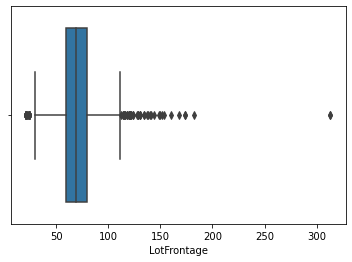

In [236]:
#To understand if thre are any outliers in the column
sns.boxplot(x=housing['LotFrontage'])
plt.show()

#### There are outliers in the column. We can impute the median to replace nulls.

In [237]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

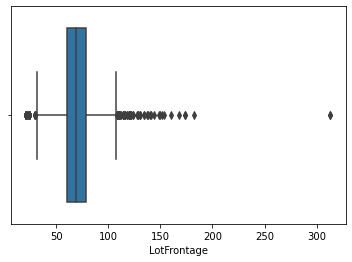

In [238]:
#To understand if thre are any outliers in the column
sns.boxplot(x=housing['LotFrontage'],orient='v',data=housing)
plt.show()

In [239]:
housing['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [240]:
import datetime as d
current_year = int(d.datetime.now().year)

###### Replacing 'GarageYrBlt','YrSold','YearBuilt','YearRemodAdd' data to store age value 

In [241]:
#Caluculating the age of the garage based on the year it was built
housing['GarageYrBlt'] = current_year-housing['GarageYrBlt']

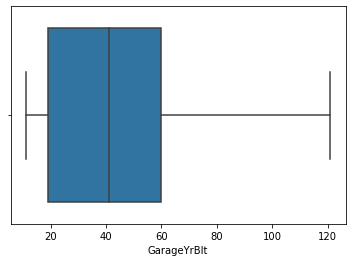

In [242]:
#To understand if thre are any outliers in the column
sns.boxplot('GarageYrBlt', data = housing)
plt.show()

In [243]:
#There are no outliers so we can impute the data with the mean of the age of which garage was built
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mean())

In [244]:
#Caluculating the number of years the house was sold from the current year
housing['YrSold'] = current_year-housing['YrSold']

In [245]:
#Caluculating the number of years the house was built from the current year
housing['YearBuilt'] = current_year-housing['YearBuilt']

In [246]:
#Caluculating the number of years the house was built from the current year
housing['YearRemodAdd'] = current_year-housing['YearRemodAdd']

In [247]:
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [248]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['GarageType'] = housing['GarageType'].replace(np.nan, 'NA')

In [249]:
housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [250]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'NA')

In [251]:
housing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [252]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'NA')

In [253]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'NA')

In [254]:
housing['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [255]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage. It is also the mode for the data
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'NA')

In [256]:
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [257]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'NA')

In [258]:
housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [259]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'NA')

In [260]:
housing['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [261]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'NA')

In [262]:
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [263]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'NA')

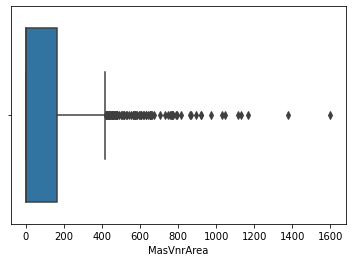

In [264]:
 #To understand if thre are any outliers in the column
sns.boxplot('MasVnrArea', data = housing)
plt.show()

In [265]:
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

In [266]:
housing['MasVnrArea'].isnull().sum()

0

In [267]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [268]:
housing['MasVnrType'].mode()

0    None
dtype: object

In [269]:
#Replacing it with the mode i.e. the None
housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None')

In [270]:
housing['MasVnrType'].isnull().sum()

0

In [271]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [272]:
#Replacing it with the mode i.e. the SBrkr
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr')

In [273]:
# Checking the percentage of null values in the dataframe 'housing' column-wise after removing nulls and cleanup
print(round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False))

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
TotalBsmtSF      0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
BsmtUnfSF        0.0
Heating          0.0
SaleCondition    0.0
OpenPorchSF      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

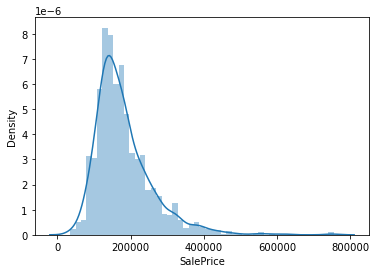

In [274]:
#To see if the 'SalePrice' column is normally distributed to apply regression on it
sns.distplot(housing['SalePrice'])
plt.show()

In [275]:
#Applying the log transformation technique on the SalePrice column to convert into a normal distributed data
housing['log_value'] = np.log(housing['SalePrice'])

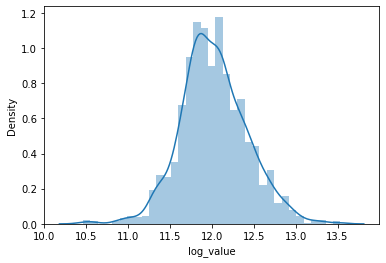

In [276]:
sns.distplot(housing['log_value'])
plt.show()

In [277]:
#converting the MSSubClass into a object class as the current column is being identified as int where in actual its being an categorical
housing['MSSubClass'] = housing['MSSubClass'].astype(object)

In [278]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [279]:
#Understand the values (excluding columns with unique values - Id) to see if there is any imbalance in the data
df_copy=housing.iloc[:,1:]
for col in df_copy.columns:
    print(col,'-',(df_copy[col].value_counts()/len(df_copy.index))*100)

MSSubClass - 20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
MSZoning - RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
LotFrontage - 69.0     18.493151
60.0      9.794521
70.0      4.794521
80.0      4.726027
50.0      3.904110
75.0      3.630137
65.0      3.013699
85.0      2.739726
78.0      1.712329
90.0      1.575342
21.0      1.575342
68.0      1.301370
24.0      1.301370
64.0      1.301370
73.0      1.232877
63.0      1.164384
55.0      1.164384
79.0      1.164384
72.0      1.164384
100.0     1.095890
74.0      1.027397
66.0      1.027397
51.0      1.027397
52.0      0.958904
59.0      0.890411
40.0      0.821918
71.0      0.821918
43.0      0.821918
67.0  

KitchenAbvGr - 1    95.342466
2     4.452055
3     0.136986
0     0.068493
Name: KitchenAbvGr, dtype: float64
KitchenQual - TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64
TotRmsAbvGrd - 6     27.534247
7     22.534247
5     18.835616
8     12.808219
4      6.643836
9      5.136986
10     3.219178
11     1.232877
3      1.164384
12     0.753425
14     0.068493
2      0.068493
Name: TotRmsAbvGrd, dtype: float64
Functional - Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64
Fireplaces - 0    47.260274
1    44.520548
2     7.876712
3     0.342466
Name: Fireplaces, dtype: float64
FireplaceQu - NA    47.260274
Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64
GarageType - Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NA          5.547945
Basment     1.301

In [280]:
#(housing['Heating'].value_counts()/len(housing.index))*100 #Can remove no much of a variance : 97 % for GasA
#(housing['SaleCondition'].value_counts()/len(housing.index))*100 #Can remove : 82% varaiance for Normal
#(housing['CentralAir'].value_counts()/len(housing.index))*100 #Can remove : 93.5% varaiance for Y
#(housing['LowQualFinSF'].value_counts()/len(housing.index))*100 #Can remove : 98.2% varaiance for 0
#(housing['KitchenAbvGr'].value_counts()/len(housing.index))*100 #Can remove : 95.3% varaiance for 1
#(housing['Functional'].value_counts()/len(housing.index))*100 #Can remove : 93.1% varaiance for Typ
#(housing['SaleType'].value_counts()/len(housing.index))*100 #Can remove : 86% varaiance for WD
#MoSold might not be a highly influential factor so we can drop it
#(housing['MiscVal'].value_counts()/len(housing.index))*100 #Can remove : 96% varaiance for 0 
#(housing['PoolArea'].value_counts()/len(housing.index))*100 #Can remove : 99% varaiance for 0 
#(housing['ScreenPorch'].value_counts()/len(housing.index))*100 #Can remove : 92% varaiance for 0 
#(housing['3SsnPorch'].value_counts()/len(housing.index))*100 #Can remove : 98% varaiance for 0
#(housing['PavedDrive'].value_counts()/len(housing.index))*100 #Can remove : 92% varaiance for Y
#(housing['PavedDrive'].value_counts()/len(housing.index))*100 #Can remove : 92% varaiance for Y
#(housing['EnclosedPorch'].value_counts()/len(housing.index))*100 #Can remove : 86% varaiance for Y
#(housing['BsmtFinSF2'].value_counts()/len(housing.index))*100 #Can remove : 88% varaiance for 0
#(housing['Condition2'].value_counts()/len(housing.index))*100 #Can remove : 98% varaiance for Norm
#(housing['BldgType'].value_counts()/len(housing.index))*100 #Can remove : 84% varaiance for 1Fam
#(housing['RoofStyle'].value_counts()/len(housing.index))*100 #Can remove : 78% varaiance for Gable
#(housing['RoofMatl'].value_counts()/len(housing.index))*100 #Can remove : 98% varaiance for CompShg
#(housing['ExterCond'].value_counts()/len(housing.index))*100 #Can remove : 87% varaiance for TA
#(housing['Utilities'].value_counts()/len(housing.index))*100 #Can remove : 99.9% varaiance for AllPub
#(housing['Electrical'].value_counts()/len(housing.index))*100 #Can remove : 99.9% varaiance for SBrkr
#(housing['BsmtCond'].value_counts()/len(housing.index))*100 #Can remove : 90% varaiance for TA
#(housing['BsmtFinType2'].value_counts()/len(housing.index))*100 #Can remove : 90% varaiance for Unf
#(housing['GarageQual'].value_counts()/len(housing.index))*100 #Can remove : 89% varaiance for TA
#(housing['GarageCond'].value_counts()/len(housing.index))*100 #Can remove : 90% varaiance for TA
#'Heating','SaleCondition', 'CentralAir', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'SaleType', 'MoSold', 'MiscVal', 'PoolArea', 
#'ScreenPorch', '3SsnPorch', 'PavedDrive', 'EnclosedPorch', 'BsmtFinSF2', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 
#'ExterCond', 'Utilities', 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond'

Have checked the Percentage variance for the columns, written the how much % of the values are same so will be dropping the columns identified respectively

In [281]:
#Dropping the columns
housing.drop(['Heating','SaleCondition', 'CentralAir', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'SaleType', 'MoSold', 'MiscVal', 'PoolArea','ScreenPorch', '3SsnPorch', 'PavedDrive', 'EnclosedPorch', 'BsmtFinSF2', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl','ExterCond', 'Utilities', 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond'], axis =1, inplace = True)

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables and then further analyse them using heatmap.

In [282]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
print(housing_numeric.columns)

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'YrSold', 'SalePrice', 'log_value'],
      dtype='object')


In [283]:
# creating dummy variables for categorical variables
# subset all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
print(housing_categorical.columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')


In [284]:
# OUTCOME COLUMN:
#out_col is 'SalePrice'

print("Cleaned dataset has ",housing.shape[0],'rows and ',housing.shape[1])

print('Number of numeric columns ',len(housing_categorical.columns))

print('Number of categorical columns ',len(housing_numeric.columns))

print('Check Data imbalance')
for col in housing_categorical.columns:
    print(col,' : ',housing[col].unique())

Cleaned dataset has  1460 rows and  52
Number of numeric columns  23
Number of categorical columns  29
Check Data imbalance
MSSubClass  :  [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphSh

#### EDA of Numerical columns

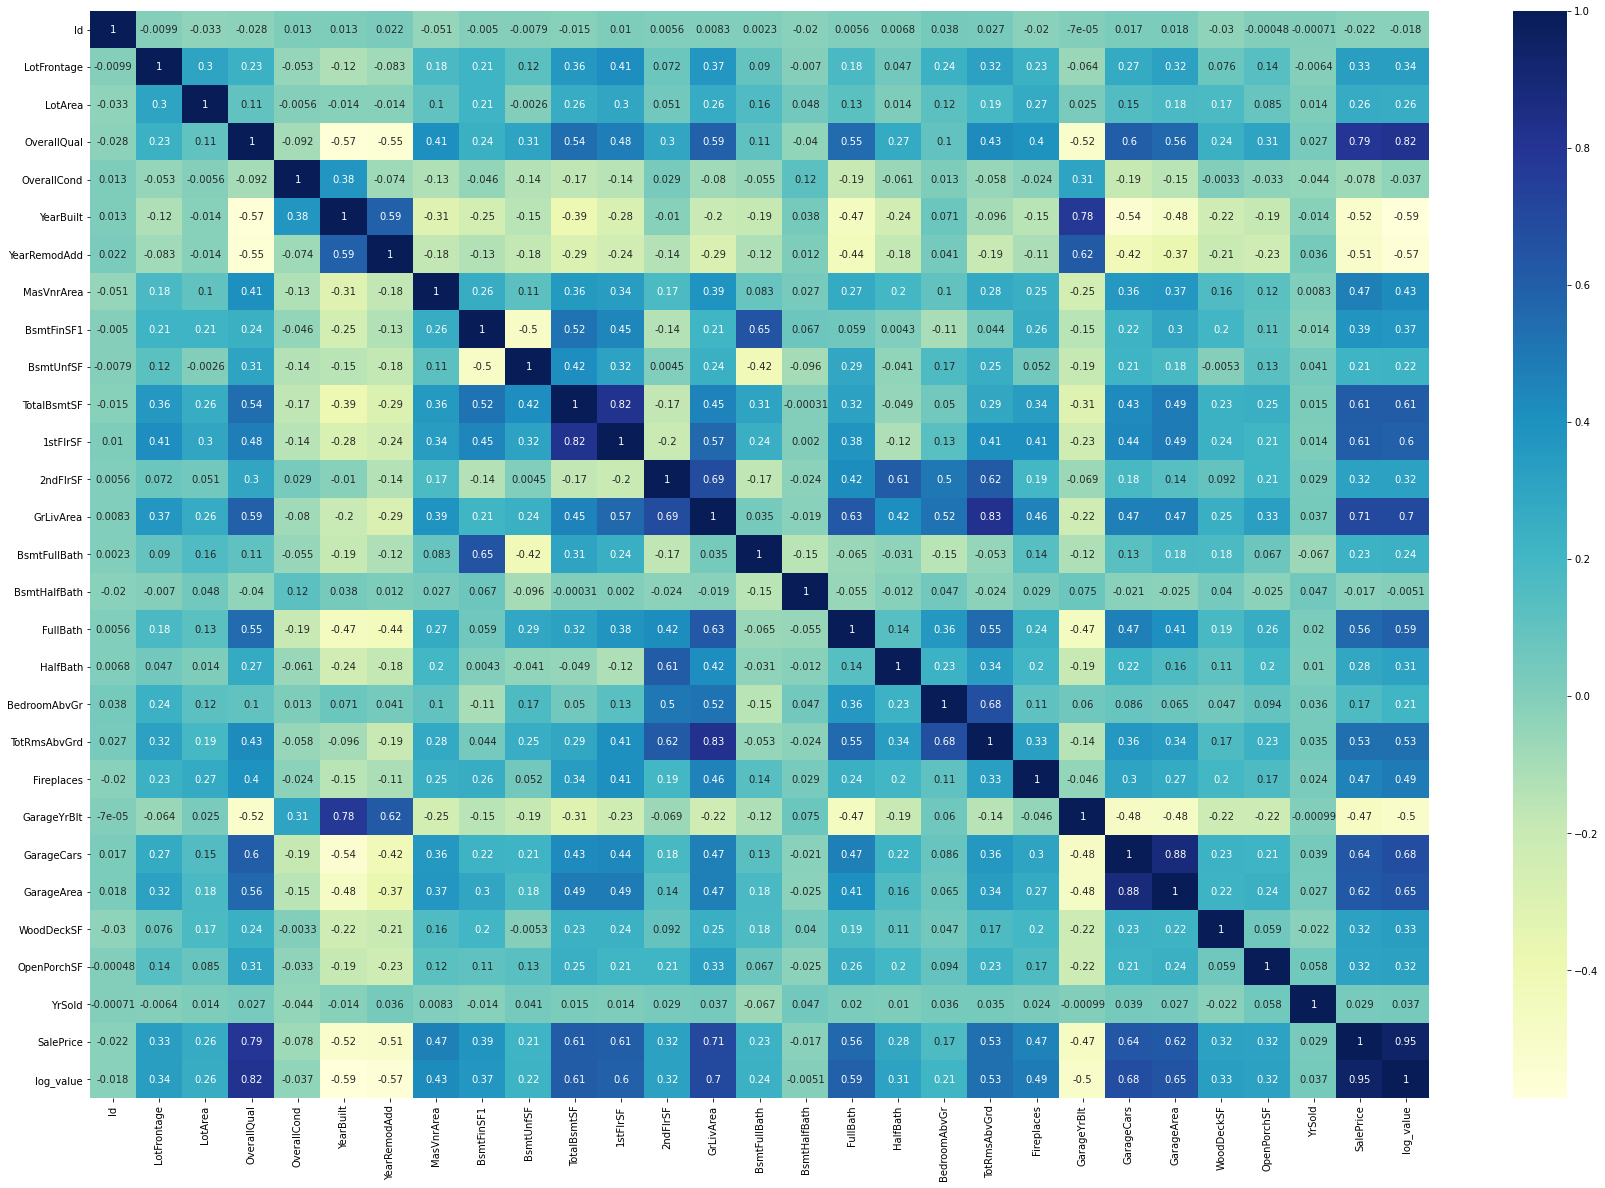

In [285]:
# correlation matrix
cor = housing_numeric.corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [286]:
print(cor*100)

                      Id  LotFrontage     LotArea  OverallQual  OverallCond  \
Id            100.000000    -0.992147   -3.322552    -2.836475     1.260892   
LotFrontage    -0.992147   100.000000   30.452217    23.481226    -5.328067   
LotArea        -3.322552    30.452217  100.000000    10.580574    -0.563627   
OverallQual    -2.836475    23.481226   10.580574   100.000000    -9.193234   
OverallCond     1.260892    -5.328067   -0.563627    -9.193234   100.000000   
YearBuilt       1.271272   -11.668539   -1.422765   -57.232277    37.598320   
YearRemodAdd    2.199764    -8.334809   -1.378843   -55.068392    -7.374150   
MasVnrArea     -5.107140    17.846857   10.332051    40.725212   -12.569363   
BsmtFinSF1     -0.502405    21.436661   21.410313    23.966597    -4.623086   
BsmtUnfSF      -0.793970    12.409821   -0.261836    30.815893   -13.684057   
TotalBsmtSF    -1.541457    36.347231   26.083313    53.780850   -17.109751   
1stFlrSF        1.049604    41.377253   29.947458   

Positive Correlated variable are, i.e with the increase in these variable , sales price is also getting increased: <BR>
- OverallQual 
- MasVnrArea
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- FullBath
- TotRmsAbvGrd
- GarageCars
- GarageArea<BR>
Negative correlated variables are, i.e with the increase in these variable , sales price is getting decreased: <BR>
- YearBuilt
- YearRemodAdd <BR>
High correlation is seen between following variables due to Multicollinearity<BR>
- GarageCars and GarageArea
- 1stFlrSF and TotalBsmtSF
- GrLivArea and TotRmsAbvGrd
- GrLivArea and TotalSF
- 1stFlrSF and TotalSF
- TotalBsmtSF and TotalSF
<BR>

### 3. Data Preparation

#### Split into X and y

In [287]:
X = housing.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold']]

y = housing['log_value']

#### Check Categorical columns

In [288]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [289]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [290]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [291]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the dataframe is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=171)

In [292]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

### 4.Model Building and Evaluation

#### Simple Linear Regression Model

In [293]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9234276196976421
-1.0164552150513944e+21


In [294]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(16566207462.283, 'GarageFinish_NA'),
 (-16566207462.253, 'GarageType_NA'),
 (13414290913.94, 'Exterior1st_CBlock'),
 (-13414290913.939, 'Exterior2nd_CBlock'),
 (-11073638515.418, 'BsmtFinType1_NA'),
 (11073638515.388, 'BsmtQual_NA'),
 (-8666417782.566, 'Exterior2nd_AsphShn'),
 (5006991613.417, 'Exterior1st_AsphShn'),
 (-262203486.76, 'constant'),
 (-1366716.882, 'Exterior2nd_Other'),
 (0.182, 'MSZoning_RL'),
 (0.145, 'MSZoning_RM'),
 (0.094, 'MSZoning_FV'),
 (0.084, 'GrLivArea'),
 (0.08, 'GarageType_Attchd'),
 (0.068, 'OverallQual'),
 (0.059, 'GarageType_Detchd'),
 (0.046, 'MSZoning_RH'),
 (-0.044, 'FireplaceQu_NA'),
 (0.043, 'Neighborhood_NridgHt'),
 (-0.042, 'BsmtQual_Gd'),
 (-0.041, 'BsmtQual_TA'),
 (0.039, 'OverallCond'),
 (0.039, 'GarageCars'),
 (0.038, 'Neighborhood_Somerst'),
 (0.037, 'Neighborhood_Crawfor'),
 (-0.036, 'KitchenQual_TA'),
 (-0.035, 'YearBuilt'),
 (-0.035, 'KitchenQual_Gd'),
 (-0.032, 'MSSubClass_160'),
 (0.032, 'HouseStyle_1Story'),
 (0.032, 'GarageType_BuiltIn

**Observation**:
1. Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.
2. Simple Linear Regression has not helped us in the feature selection.

### 5. Advanced Regression - Ridge and Lasso Regression

#### Ridge Regression

In [295]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [296]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008120,0.004276,0.004777,0.001703,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,-0.098685,-0.097559,0.004463,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.015400,0.004143,0.002890,0.002977,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,-0.098685,-0.097558,0.004463,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.013843,0.002210,0.003290,0.002339,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,-0.098682,-0.097554,0.004462,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.015862,0.009908,0.006249,0.007653,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,-0.098672,-0.097537,0.004460,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.015863,0.000450,0.006252,0.007657,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,-0.098660,-0.097517,0.004460,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599


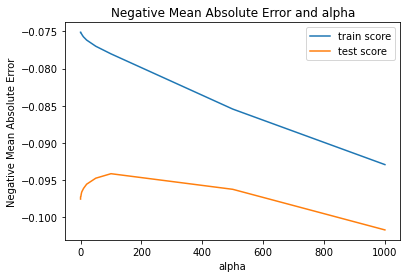

In [297]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [298]:
print("\n The best estimator across ALL searched params:\n",
          model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_cv.best_params_)


 The best estimator across ALL searched params:
 Ridge(alpha=100)

 The best score across ALL searched params:
 -0.0941458456001448

 The best parameters across ALL searched params:
 {'alpha': 100}


In [299]:
#Using the best hyper parameter in the ridge Regression
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([-6.80271628e-03,  1.73903140e-02,  6.28766532e-02,  3.74476105e-02,
       -2.62568097e-02, -2.31702539e-02,  3.17720331e-03, -1.08348294e-03,
        4.27586345e-03,  9.80665331e-03,  2.83588265e-02,  2.46357923e-02,
        4.07317110e-02,  2.15385517e-02,  3.28665045e-04,  2.28668592e-02,
        2.00444399e-02,  1.09856989e-02,  1.81769787e-02,  8.33989794e-03,
       -5.71667258e-03,  2.84044367e-02,  1.64090567e-02,  1.03088771e-02,
       -1.29182493e-03,  5.57504126e-03, -2.08090297e-02, -2.69343477e-03,
       -4.60225130e-03,  3.38822111e-03, -5.94354412e-03,  9.77909352e-03,
        9.62490904e-03, -3.60753593e-03,  1.39589416e-03, -7.13878412e-03,
       -1.55271464e-02, -2.27202191e-02, -8.27012027e-03, -8.53540264e-03,
        1.40358949e-02,  5.66952369e-03,  2.51479887e-02,  1.13397451e-02,
        6.26970027e-03,  4.66621126e-03, -7.97932606e-03,  2.97957888e-03,
        1.02425215e-02,  1.02343206e-02,  1.72015292e-02,  9.21440782e-03,
       -8.12045004e-03, -

In [300]:
# predict for the training dataset
y_train_pred = ridge.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

The training accuracy is:
0.914719927122091


In [301]:
# predict for the test dataset
y_test_pred = ridge.predict(X_test)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The testing accuracy is:
0.8801528339520653


The models training and testing accuracy are way nearer and decent enough

In [302]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
ridge_list = pd.DataFrame(list(zip(cols, model_parameters)))
ridge_list.columns = ['Feature','Coef']

In [303]:
ridge_list.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
2,LotArea,0.062877
12,2ndFlrSF,0.040732
3,OverallQual,0.037448
21,GarageYrBlt,0.028404
10,TotalBsmtSF,0.028359
72,Neighborhood_NoRidge,0.027034
42,MSZoning_RH,0.025148
11,1stFlrSF,0.024636
15,BsmtHalfBath,0.022867
62,Neighborhood_CollgCr,0.022693


In [304]:
final_pred_ridge = []
for i,row in ridge_list.iterrows():
    if(row.Coef!=0):
        final_pred_ridge.append(row.Feature)
print('Number of predictors selected by optimal alpha for ridge are:{0}'.format(len(final_pred_ridge)))

Number of predictors selected by optimal alpha for ridge are:170


**Observations**
- Ridge regression gave us a complex model with most of the coefficients as non-zero values.
- Ridge regression has not helped us in the feature selection.

#### Hyper parameter value tuning for Ridge
Doubling the optimal value (from 100 to 200)

In [305]:
alpha_double = 200
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([-3.31383403e-03,  1.54900882e-02,  5.64765985e-02,  3.37464530e-02,
       -2.11240193e-02, -2.36658234e-02,  5.56189351e-03,  3.17082642e-03,
        4.60711885e-03,  1.35203870e-02,  2.71465850e-02,  1.97355464e-02,
        3.59552479e-02,  1.90443425e-02,  1.63960334e-04,  2.15225487e-02,
        1.82958265e-02,  1.06932801e-02,  2.01390903e-02,  1.19501884e-02,
       -7.12561134e-03,  2.56884790e-02,  1.81841183e-02,  1.06505247e-02,
        6.08792477e-05,  4.90169818e-03, -2.06651180e-02, -2.37590609e-03,
       -2.87511434e-03,  3.00854403e-03, -1.94014805e-03,  9.80290838e-03,
        7.19613139e-03, -3.10087194e-03,  1.04488721e-03, -6.41514054e-03,
       -1.20377311e-02, -1.84230647e-02, -7.37423955e-03, -8.13649814e-03,
        1.06702726e-02,  3.36431249e-03,  1.72122371e-02,  1.48519560e-03,
        5.60514366e-03,  4.38369090e-03, -8.91127123e-03,  1.55093943e-03,
        8.31710889e-03,  8.23389040e-03,  1.28531505e-02,  9.63692604e-03,
       -6.65888768e-03, -

In [306]:
# predict
y_train_pred_double = ridge_double.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))


0.9098089180129811


In [307]:
y_test_pred = ridge_double.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8783127575513227


In [308]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge_double.coef_)
ridge_double_list = pd.DataFrame(list(zip(cols, model_parameters)))
ridge_double_list.columns = ['Feature','Coef']

In [309]:
ridge_double_list.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
2,LotArea,0.056477
12,2ndFlrSF,0.035955
3,OverallQual,0.033746
10,TotalBsmtSF,0.027147
21,GarageYrBlt,0.025688
72,Neighborhood_NoRidge,0.024060
15,BsmtHalfBath,0.021523
62,Neighborhood_CollgCr,0.020395
18,BedroomAbvGr,0.020139
11,1stFlrSF,0.019736


In [310]:
final_pred_ridge_double =[]
for i,row in ridge_double_list.iterrows():
    if(row.Coef!=0):
        final_pred_ridge_double.append(row.Feature)
print('Number of predictors selected by double the optimal alpha for ridge are:{0}'.format(len(final_pred_ridge_double)))

Number of predictors selected by double the optimal alpha for ridge are:170


**Observations**
- Doubling the alpha didn't in feature selection.
- Accuracy of the model is almost remained the same even after doubling the alpha(for alpha = 100 & 200).

### Lasso

In [311]:
# list of alphas to tune
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]}


lasso = Lasso()

# cross validation
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        #scoring= 'neg_mean_absolute_error', 
                        scoring = 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [312]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008120,0.004276,0.004777,0.001703,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,-0.098685,-0.097559,0.004463,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.015400,0.004143,0.002890,0.002977,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,-0.098685,-0.097558,0.004463,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.013843,0.002210,0.003290,0.002339,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,-0.098682,-0.097554,0.004462,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.015862,0.009908,0.006249,0.007653,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,-0.098672,-0.097537,0.004460,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.015863,0.000450,0.006252,0.007657,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,-0.098660,-0.097517,0.004460,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599


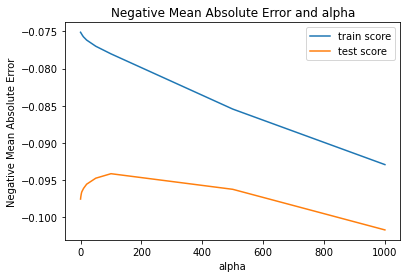

In [313]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [314]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001)

 The best score across ALL searched params:
 0.8571593335625962

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [315]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [316]:
lasso.coef_

array([-9.99578312e-03,  1.84249397e-02,  7.51006739e-02,  4.17795743e-02,
       -4.75934387e-02, -2.11751767e-02, -0.00000000e+00, -0.00000000e+00,
        4.68766402e-03,  0.00000000e+00,  8.74891105e-05,  0.00000000e+00,
        9.91391956e-02,  2.36554998e-02,  0.00000000e+00,  1.93155608e-02,
        1.68519902e-02,  8.76654530e-03,  9.28262428e-03,  0.00000000e+00,
       -9.31605582e-04,  4.21052728e-02,  5.05697748e-03,  8.98906817e-03,
       -3.73570945e-04,  4.26484769e-03, -2.12996008e-02, -3.01766081e-03,
       -7.45831854e-04,  1.30575747e-03, -1.88064634e-02,  3.05935938e-03,
        3.01643296e-03, -4.10256654e-03,  0.00000000e+00, -7.41564343e-03,
       -1.79686245e-02, -3.42160823e-02, -9.32049888e-03, -8.87856675e-03,
        4.26874672e-02,  2.14062882e-02,  8.84176590e-02,  5.99136884e-02,
        5.03382218e-03,  4.32384060e-03, -6.25009374e-03,  2.25850481e-03,
        1.14876219e-02,  1.29799730e-02,  2.17042536e-02,  7.59250636e-03,
       -7.52751026e-03, -

In [317]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
model_parameters = list(lasso.coef_)
lasso_list = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_list.columns = ['Feature','Coef']

In [318]:
lasso_list.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
12,GrLivArea,0.099139
42,MSZoning_RL,0.088418
2,OverallQual,0.075101
43,MSZoning_RM,0.059914
40,MSZoning_FV,0.042687
21,GarageCars,0.042105
3,OverallCond,0.041780
72,Neighborhood_NridgHt,0.030465
77,Neighborhood_Somerst,0.027821
62,Neighborhood_Crawfor,0.027251


In [319]:
#### Make predictions using optimal value of alpha

In [320]:
#Using alpha = 0.001
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9183979804109303
The test accuracy is:
0.8851756193022349


In [321]:
model_parameters = list(lm.coef_)
# model coefficients
cols = X.columns
model_parameters = list(lm.coef_)
lasso_list = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_list.columns = ['Feature','Coef']

In [322]:
lasso_list.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
12,GrLivArea,0.099139
42,MSZoning_RL,0.088418
2,OverallQual,0.075101
43,MSZoning_RM,0.059914
40,MSZoning_FV,0.042687
21,GarageCars,0.042105
3,OverallCond,0.041780
72,Neighborhood_NridgHt,0.030465
77,Neighborhood_Somerst,0.027821
62,Neighborhood_Crawfor,0.027251


In [323]:
final_pred_lasso =[]
for i,row in lasso_list.iterrows():
    if(row.Coef!=0):
        final_pred_lasso.append(row.Feature)
print('Number of predictors selected by optimaloptimal alpha for ridge are:{0}'.format(len(final_pred_lasso)))

Number of predictors selected by optimaloptimal alpha for ridge are:127


- Double the Alpha for Lasso
- Previously the alpha was 0.001, so now we are taking 0.002

In [324]:
lm_double = Lasso(alpha=0.002)
lm_double.fit(X_train, y_train)

# predict
y_train_pred_double = lm_double.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))

The training accuracy is:
0.9114997487189402
The test accuracy is:
0.8851756193022349


In [325]:
model_parameters = list(lm_double.coef_)
# model coefficients
cols = X.columns
model_parameters = list(lm_double.coef_)
lasso_list = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_list.columns = ['Feature','Coef']

In [326]:
lasso_list.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
12,GrLivArea,0.091412
2,OverallQual,0.083408
21,GarageCars,0.043194
3,OverallCond,0.042199
72,Neighborhood_NridgHt,0.028995
77,Neighborhood_Somerst,0.027738
62,Neighborhood_Crawfor,0.025627
13,BsmtFullBath,0.024520
42,MSZoning_RL,0.020393
82,Condition1_Norm,0.019626


In [327]:
a = list(zip(cols, model_parameters))
#List of all predictors with non zero co-efficients

final_pred =[]
for i in range(len(a)):
    if(a[i][1]!=0):
        final_pred.append(a[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_pred)))

Number of predictors selected by double the optimal alpha for lasso are:113


**Observations**
- Lasso Regression gave us a simpler model with most of the coefficients as zero values.
- Lasso Regression has helped us in the feature selection.
- Doubling the alpha helped in feature reduction though the accuracy didn't vary much.

### Summary 

**After creating model in both Ridge and Lasso, we can see that the r2_scores are almost same for both of them. However, lasso will penalize more on the given dataset and helps in feature elemination. So, considering Lasso for final model.**

In [328]:
coef = pd.Series(lm.coef_, index = X_train.columns)
var_selected = sum(coef != 0)
print('Lasso has selected {} variables'.format(var_selected))

Lasso has selected 127 variables


In [329]:
# Best variables predicting housing prices as per Lasso Regression
main_coef = pd.concat([coef.sort_values().head(10),
                       coef.sort_values().tail(10)])

main_coef.sort_values(ascending=False).head(10)

GrLivArea               0.099139
MSZoning_RL             0.088418
OverallQual             0.075101
MSZoning_RM             0.059914
MSZoning_FV             0.042687
GarageCars              0.042105
OverallCond             0.041780
Neighborhood_NridgHt    0.030465
Neighborhood_Somerst    0.027821
Neighborhood_Crawfor    0.027251
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

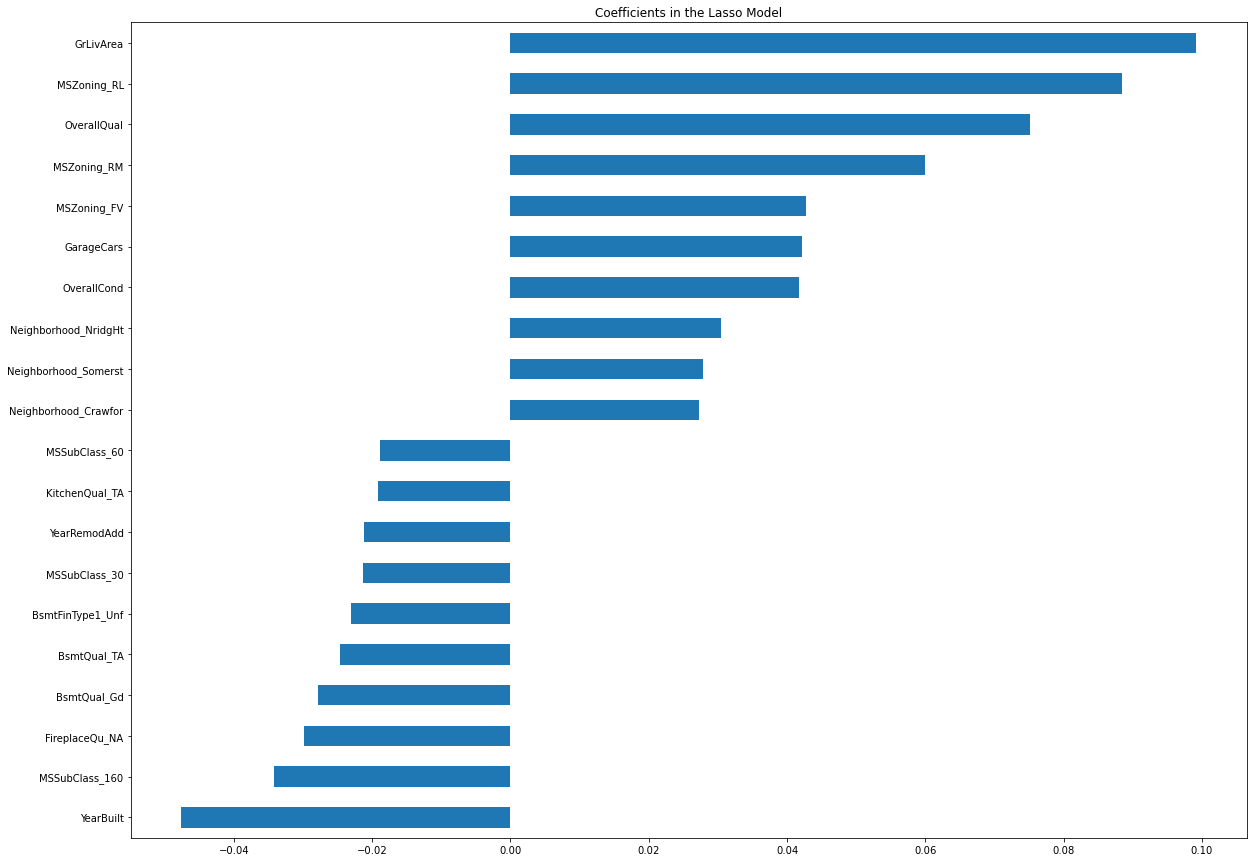

In [330]:
# Let's plot these variables
plt.figure(figsize = (20,15))

main_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### Conclusion

Following are the most significant variables in predicting the price of a house:
- GrLivArea
- MSZoning (Identifies the general zoning classification of the sale)
   MSZoning_RL,MSZoning_RM,MSZoning_FV (Residential Low Density, Residential Medium Density and Floating Village Residential)
- OverallQual(Overall material and finish of the house)
- GarageCars
- OverallCond(Rates the overall condition of the house)

Top 5 predictors are: <BR>
- GrLivArea
- MSZoning_RL
- OverallQual
- MSZoning_RM
- MSZoning_FV
 


- Best value of alpha while using Ridge Regression : **{'alpha': 100}** 
- Best value of alpha while using Lasso Regression : **{'alpha': 0.001}**<BR>


### Assignment Part 2

#### Q3. Removing the top 5 contributors from dataset and create Lasso Regression:

In [331]:
X_train_new = X_train.drop(['GrLivArea','MSZoning_RL','OverallQual','MSZoning_RM','MSZoning_FV'], axis=1)

In [332]:
X_test_new = X_test.drop(['GrLivArea','MSZoning_RL','OverallQual','MSZoning_RM','MSZoning_FV'], axis=1)
X_train_new.columns

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=166)

In [333]:
model_lasso_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [334]:
cv_results_lasso = pd.DataFrame(model_lasso_cv.cv_results_)

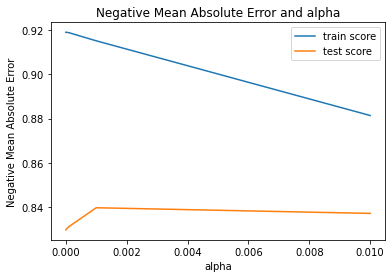

In [335]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [336]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001)

 The best score across ALL searched params:
 0.8397040486574378

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [337]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.001)

In [338]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_list.columns = ['Feature','Coef']

In [339]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_new)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9086065923397727
The test accuracy is:
0.8689619991527733


In [340]:
top10=lasso_list.sort_values(by='Coef',ascending=False).head(10)
print('Top 5 predictors of the model are:')
print(top10['Feature'][:5])

Top 5 predictors of the model are:
9                BsmtUnfSF
10             TotalBsmtSF
2                  LotArea
19            TotRmsAbvGrd
67    Neighborhood_MeadowV
Name: Feature, dtype: object


In [341]:
final_lasso_new_pred =[]
for i,row in lasso_list.iterrows():
    if(row.Coef!=0):
        final_lasso_new_pred.append(row.Feature)        
    
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_lasso_new_pred)))

Number of predictors selected by double the optimal alpha for lasso are:133
